In [1]:
# import required modules
import numpy as np 
import yfinance as yf 
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

### Data Collection 

Collect the data from yfinance API. The data should be 1-day period, 1-week period, 1-year period and 10-years period.

In [2]:
gold_one_day = yf.download('GC=F', interval="1m", period="1d")
gold_one_month = yf.download('GC=F', interval="5m", period="1mo")
gold_one_year = yf.download('GC=F', period="1y")
gold_ten_year = yf.download('GC=F', period="10y")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Check the data to make sure no missing values. 

In [3]:
# check out the first 5 rows
print("Gold one day data <1 min interval>")
gold_one_day.head(5)

Gold one day data <1 min interval>


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-07-11 00:00:00-04:00,2383.899902,2384.199951,2383.800049,2383.899902,2383.899902,0
2024-07-11 00:01:00-04:00,2383.899902,2384.300049,2383.899902,2384.300049,2384.300049,20
2024-07-11 00:02:00-04:00,2384.399902,2384.399902,2384.199951,2384.300049,2384.300049,7
2024-07-11 00:03:00-04:00,2384.399902,2384.399902,2384.199951,2384.199951,2384.199951,16
2024-07-11 00:04:00-04:00,2384.199951,2384.199951,2384.100098,2384.199951,2384.199951,4


In [4]:
print("Gold one month data <5 min interval>")
gold_one_month.head(5)

Gold one month data <5 min interval>


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-06-11 09:50:00-04:00,2329.899902,2332.399902,2328.899902,2331.199951,2331.199951,0
2024-06-11 09:55:00-04:00,2331.100098,2332.300049,2330.100098,2331.899902,2331.899902,734
2024-06-11 10:00:00-04:00,2331.800049,2334.500000,2331.100098,2332.199951,2332.199951,1769
2024-06-11 10:05:00-04:00,2332.300049,2334.399902,2331.800049,2333.199951,2333.199951,999
2024-06-11 10:10:00-04:00,2333.399902,2333.899902,2330.500000,2331.199951,2331.199951,745


In [5]:
print("Gold one year data <1 day interval>")
gold_one_year.head(5)

Gold one year data <1 day interval>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-11,1925.000000,1937.000000,1924.199951,1931.300049,1931.300049,142
2023-07-12,1932.300049,1958.000000,1932.199951,1956.199951,1956.199951,132
2023-07-13,1961.099976,1961.099976,1953.000000,1959.199951,1959.199951,121
2023-07-14,1958.400024,1960.599976,1952.699951,1960.099976,1960.099976,94
2023-07-17,1954.000000,1956.500000,1946.599976,1952.400024,1952.400024,29


In [6]:
print("Gold ten years data <1 day interval>")
gold_ten_year.head(5)

Gold ten years data <1 day interval>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-11,1337.900024,1339.000000,1336.199951,1337.000000,1337.000000,112
2014-07-14,1332.800049,1332.800049,1304.699951,1306.300049,1306.300049,103
2014-07-15,1307.400024,1311.900024,1294.099976,1296.900024,1296.900024,368
2014-07-16,1298.400024,1303.099976,1296.900024,1299.599976,1299.599976,34
2014-07-17,1303.099976,1323.800049,1303.099976,1316.699951,1316.699951,16


In [7]:
# check for missing values
for index, i in {"gold_one_day": gold_one_day, "gold_one_month": gold_one_month, 
                 "gold_one_year": gold_one_year, "gold_one_year": gold_one_year, "gold_ten_year": gold_ten_year}.items():
    print(index)
    print("------------")
    print(i.isna().sum(), end="\n\n")


gold_one_day
------------
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

gold_one_month
------------
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

gold_one_year
------------
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

gold_ten_year
------------
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64



No missing values. Save all data files as commas seprarted values (CSV) files.

In [8]:
# save the data as csv file
gold_one_day.to_csv('data/gold_one_day.csv')
gold_one_month.to_csv('data/gold_one_month.csv')
gold_one_year.to_csv('data/gold_one_year.csv')
gold_ten_year.to_csv('data/gold_ten_year.csv')

### Load the CSV files into dataframes. 

In [9]:
# load gold data for one day (1 min interval)
df_one_day = pd.read_csv('data/gold_one_day.csv')

In [10]:
# load gold data for one month (5 min interval)
df_one_month = pd.read_csv('data/gold_one_month.csv')

In [11]:
# load gold data for one year (1 day interval)
df_one_year = pd.read_csv('data/gold_one_year.csv')

In [12]:
# load gold data for one year (1 day interval)
df_ten_year = pd.read_csv('data/gold_ten_year.csv')

#### First perform ARIMA with gold data for one day. 

In [13]:
# check the structure
df_one_day.head(5)

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2024-07-11 00:00:00-04:00,2383.899902,2384.199951,2383.800049,2383.899902,2383.899902,0
1,2024-07-11 00:01:00-04:00,2383.899902,2384.300049,2383.899902,2384.300049,2384.300049,20
2,2024-07-11 00:02:00-04:00,2384.399902,2384.399902,2384.199951,2384.300049,2384.300049,7
3,2024-07-11 00:03:00-04:00,2384.399902,2384.399902,2384.199951,2384.199951,2384.199951,16
4,2024-07-11 00:04:00-04:00,2384.199951,2384.199951,2384.100098,2384.199951,2384.199951,4


In [14]:
# check the data type
df_one_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Datetime   576 non-null    object 
 1   Open       576 non-null    float64
 2   High       576 non-null    float64
 3   Low        576 non-null    float64
 4   Close      576 non-null    float64
 5   Adj Close  576 non-null    float64
 6   Volume     576 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 31.6+ KB


Datatime column needs to be datatime data type. Convert it right away.

In [15]:
# drop columns named Adj Close and Volume 
df_one_day.drop(columns=['Adj Close', 'Volume'], inplace=True)

In [16]:
# convert Datetime column to datetime datatype 
df_one_day['Datetime']= pd.to_datetime(df_one_day['Datetime'])

In [17]:
# display the first five rows to ensure 
df_one_day.head(5)

,Datetime,Open,High,Low,Close
0,2024-07-11 00:00:00-04:00,2383.899902,2384.199951,2383.800049,2383.899902
1,2024-07-11 00:01:00-04:00,2383.899902,2384.300049,2383.899902,2384.300049
2,2024-07-11 00:02:00-04:00,2384.399902,2384.399902,2384.199951,2384.300049
3,2024-07-11 00:03:00-04:00,2384.399902,2384.399902,2384.199951,2384.199951
4,2024-07-11 00:04:00-04:00,2384.199951,2384.199951,2384.100098,2384.199951


In [18]:
# check the data types again
df_one_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype                    
---  ------    --------------  -----                    
 0   Datetime  576 non-null    datetime64[ns, UTC-04:00]
 1   Open      576 non-null    float64                  
 2   High      576 non-null    float64                  
 3   Low       576 non-null    float64                  
 4   Close     576 non-null    float64                  
dtypes: datetime64[ns, UTC-04:00](1), float64(4)
memory usage: 22.6 KB


In [19]:
# set datetime as index 
df_one_day.set_index('Datetime', inplace=True)

In [20]:
# check the statistics 
df_one_day.describe()

,Open,High,Low,Close
count,576.000000,576.000000,576.000000,576.000000
mean,2389.970313,2390.356424,2389.601214,2390.005900
std,8.309857,8.619295,8.032175,8.325051
min,2383.800049,2383.899902,2383.100098,2383.800049
25%,2386.199951,2386.474976,2385.899902,2386.199951
50%,2387.100098,2387.300049,2386.899902,2387.100098
75%,2388.399902,2388.600098,2388.199951,2388.399902
max,2417.899902,2418.699951,2416.300049,2417.800049


## Visualize the data

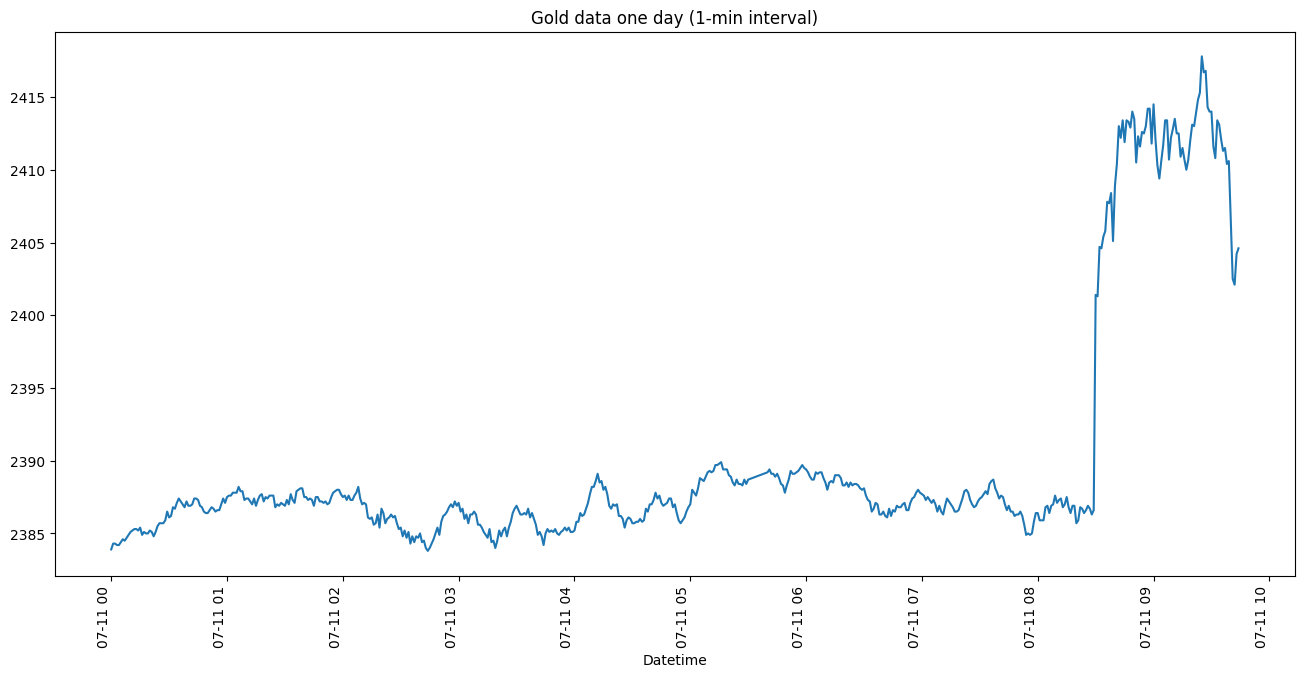

In [21]:
# Create a plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the DataFrame
df_one_day['Close'].plot(ax=ax)

plt.title("Gold data one day (1-min interval)")

# Rotate x-axis labels 90 degrees
plt.xticks(rotation=90)

# Show plot
plt.show()


In [22]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df_one_day['Close'])

In [23]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [24]:
adfuller_test(df_one_day['Close'])

ADF Test Statistic : -1.7935133148821465
p-value : 0.38368687517937505
#Lags Used : 12
Number of Observations Used : 563
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Differencing 

In [25]:
df_one_day['Close Price Difference'] = df_one_day['Close'] - df_one_day['Close'].shift(1)

In [26]:
df_one_day['Close'] - df_one_day['Close'].shift(1)

Datetime
2024-07-11 00:00:00-04:00         NaN
2024-07-11 00:01:00-04:00    0.400146
2024-07-11 00:02:00-04:00    0.000000
2024-07-11 00:03:00-04:00   -0.100098
2024-07-11 00:04:00-04:00    0.000000
                               ...   
2024-07-11 09:40:00-04:00   -4.000000
2024-07-11 09:41:00-04:00   -4.100098
2024-07-11 09:42:00-04:00   -0.399902
2024-07-11 09:43:00-04:00    2.099854
2024-07-11 09:44:00-04:00    0.400146
Name: Close, Length: 576, dtype: float64

In [27]:
df_one_day.Close.diff()

Datetime
2024-07-11 00:00:00-04:00         NaN
2024-07-11 00:01:00-04:00    0.400146
2024-07-11 00:02:00-04:00    0.000000
2024-07-11 00:03:00-04:00   -0.100098
2024-07-11 00:04:00-04:00    0.000000
                               ...   
2024-07-11 09:40:00-04:00   -4.000000
2024-07-11 09:41:00-04:00   -4.100098
2024-07-11 09:42:00-04:00   -0.399902
2024-07-11 09:43:00-04:00    2.099854
2024-07-11 09:44:00-04:00    0.400146
Name: Close, Length: 576, dtype: float64

In [28]:
df_one_day

,Open,High,Low,Close,Close Price Difference
Datetime,,,,,
2024-07-11 00:00:00-04:00,2383.899902,2384.199951,2383.800049,2383.899902,NaN
2024-07-11 00:01:00-04:00,2383.899902,2384.300049,2383.899902,2384.300049,0.400146
2024-07-11 00:02:00-04:00,2384.399902,2384.399902,2384.199951,2384.300049,0.000000
2024-07-11 00:03:00-04:00,2384.399902,2384.399902,2384.199951,2384.199951,-0.100098
2024-07-11 00:04:00-04:00,2384.199951,2384.199951,2384.100098,2384.199951,0.000000
...,...,...,...,...,...
2024-07-11 09:40:00-04:00,2410.500000,2410.500000,2406.399902,2406.600098,-4.000000
2024-07-11 09:41:00-04:00,2406.600098,2407.699951,2402.300049,2402.500000,-4.100098
2024-07-11 09:42:00-04:00,2402.600098,2403.000000,2401.500000,2402.100098,-0.399902


In [29]:
## Again test dickey fuller test
adfuller_test(df_one_day['Close Price Difference'].dropna())

ADF Test Statistic : -4.9452648104224775
p-value : 2.8448629833602627e-05
#Lags Used : 11
Number of Observations Used : 563
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [30]:
# first differencing 
adfuller_test(df_one_day.Close.diff().dropna())

ADF Test Statistic : -4.9452648104224775
p-value : 2.8448629833602627e-05
#Lags Used : 11
Number of Observations Used : 563
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


#### The data becomes stationary after one differencing. The degree of "d" is 1.

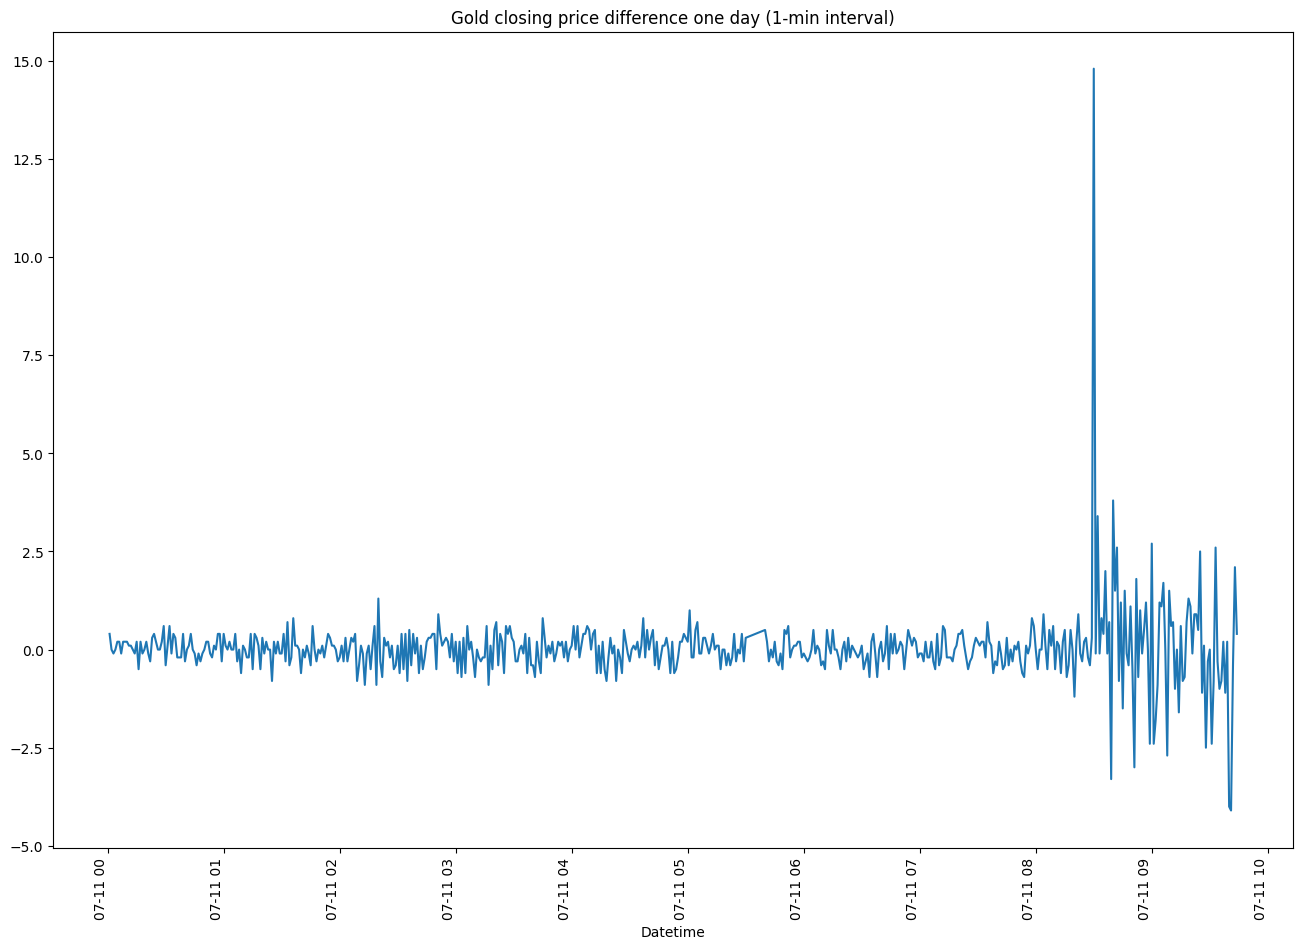

In [31]:
# Create a plot
fig, ax = plt.subplots(figsize=(16, 12))

# Plot the DataFrame
df_one_day['Close Price Difference'].plot(ax=ax)

plt.title("Gold closing price difference one day (1-min interval)")

# Rotate x-axis labels 90 degrees
plt.xticks(rotation=90)

# Show plot
plt.show()


It has variance non-stationary. Stop the process a while. 

In [32]:
# Visalize 10 years data 

df_ten_year.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-07-11,1337.900024,1339.000000,1336.199951,1337.000000,1337.000000,112
1,2014-07-14,1332.800049,1332.800049,1304.699951,1306.300049,1306.300049,103
2,2014-07-15,1307.400024,1311.900024,1294.099976,1296.900024,1296.900024,368
3,2014-07-16,1298.400024,1303.099976,1296.900024,1299.599976,1299.599976,34
4,2014-07-17,1303.099976,1323.800049,1303.099976,1316.699951,1316.699951,16


In [33]:
df_ten_year.drop(columns=['Adj Close', 'Volume'], inplace=True)

In [34]:
# convert Datetime column to datetime datatype 
df_ten_year['Date']= pd.to_datetime(df_ten_year['Date'])

In [35]:
# set 'Date' to index
df_ten_year.set_index('Date', inplace=True)

In [36]:
# display the first 5 rows 
df_ten_year.head(5)

,Open,High,Low,Close
Date,,,,
2014-07-11,1337.900024,1339.000000,1336.199951,1337.000000
2014-07-14,1332.800049,1332.800049,1304.699951,1306.300049
2014-07-15,1307.400024,1311.900024,1294.099976,1296.900024
2014-07-16,1298.400024,1303.099976,1296.900024,1299.599976
2014-07-17,1303.099976,1323.800049,1303.099976,1316.699951


C:\Users\user\AppData\Local\Temp\ipykernel_26696\981918079.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_ten_year.index.strftime('%Y-%m-%d'))


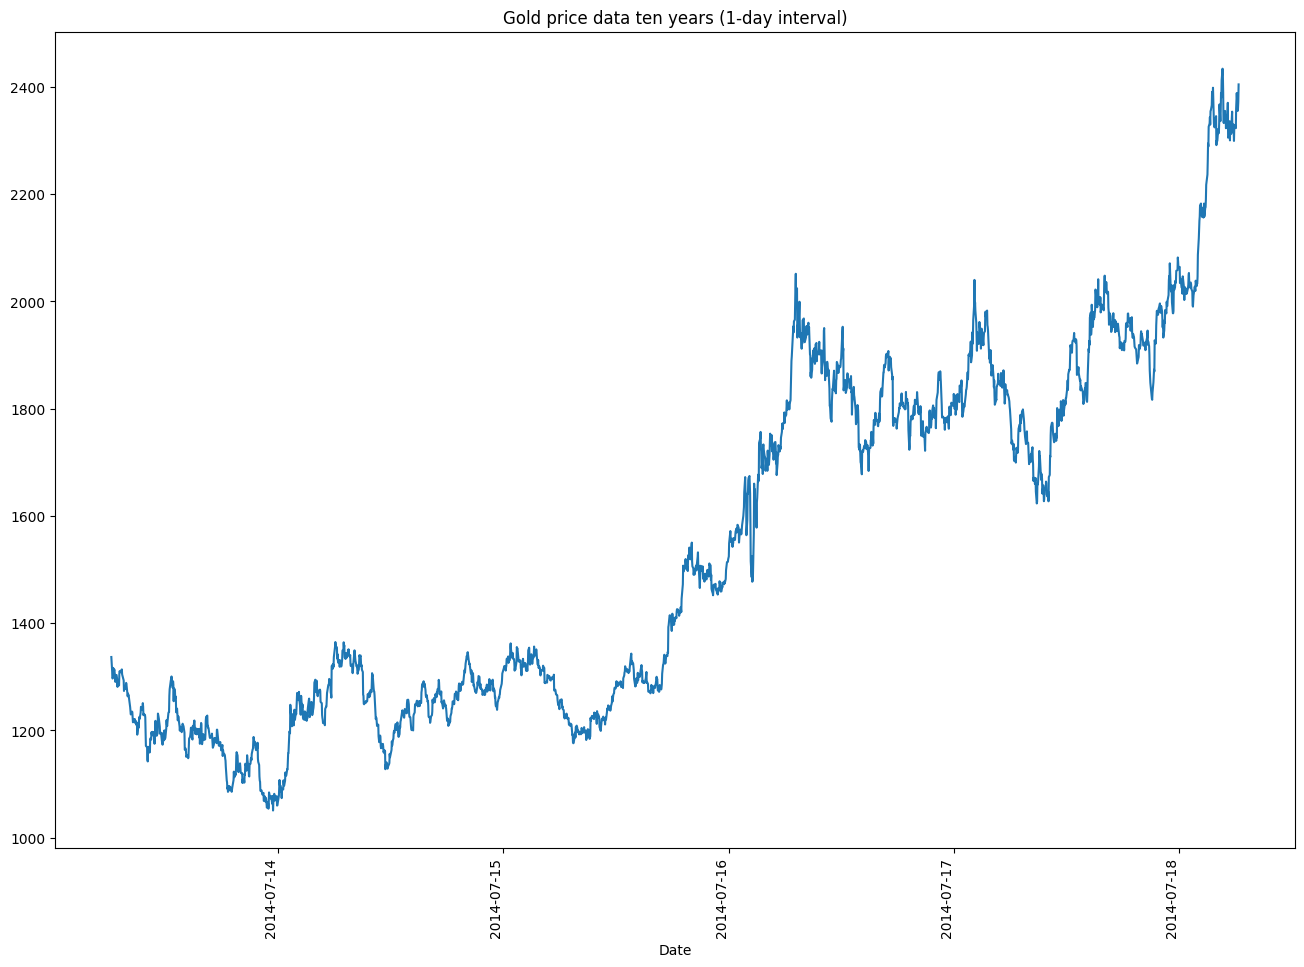

In [37]:
# visualize the data 

# Create a plot
fig, ax = plt.subplots(figsize=(16, 12))

# Plot the DataFrame
df_ten_year['Close'].plot(ax=ax)

plt.title("Gold price data ten years (1-day interval)")

# Set x-axis labels
ax.set_xticklabels(df_ten_year.index.strftime('%Y-%m-%d'))

# Rotate x-axis labels 90 degrees
plt.xticks(rotation=90)

# Show plot
plt.show()

This is a non-stationary data because there are trends. Remove the trends to make the data stationary. 

In [38]:
# First differencing 
adfuller_test(df_ten_year.Close.diff().dropna())

ADF Test Statistic : -20.290689429156693
p-value : 0.0
#Lags Used : 6
Number of Observations Used : 2507
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


The data becomes stationary after one differencing. The degree of "d" is 1. To make sure let's see second differencing. 

In [39]:
df_ten_year.Close.diff().diff()

Date
2014-07-11          NaN
2014-07-14          NaN
2014-07-15    21.299927
2014-07-16    12.099976
2014-07-17    14.400024
                ...    
2024-07-05    -8.100098
2024-07-08   -62.000000
2024-07-09    38.200195
2024-07-10     7.199707
2024-07-11    20.300293
Name: Close, Length: 2515, dtype: float64

In [40]:
# Second differencing 
adfuller_test(df_ten_year.Close.diff().diff().dropna())

ADF Test Statistic : -17.681248515344176
p-value : 3.607316162328404e-30
#Lags Used : 27
Number of Observations Used : 2485
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


There is not a very difference. Therefore, degree of integration should be 1. 

The next step is to determine the degree of "p" and "q". In order to determine those values, we need to consider the ACFs and PACFs.

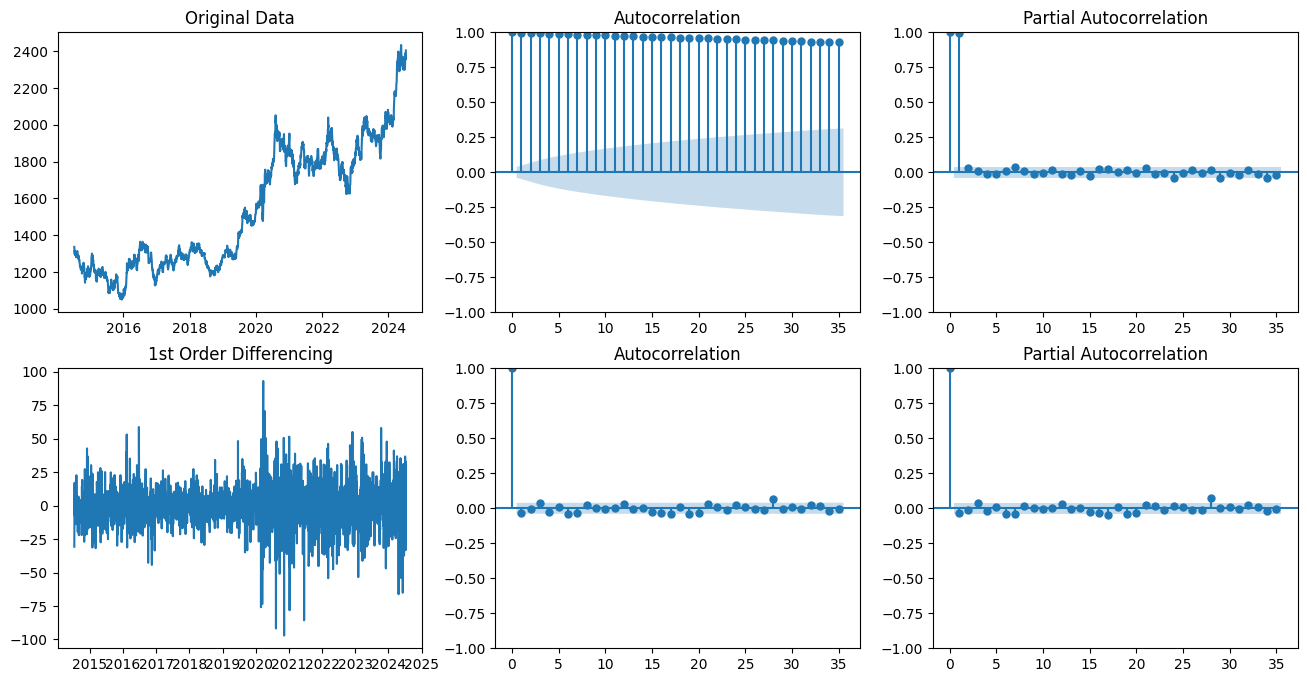

In [41]:
# plot original data 
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(231)  # Corrected typo here
ax1.set_title('Original Data')
ax1.plot(df_ten_year.Close);

ax2 = fig.add_subplot(232)
plot_acf(df_ten_year.Close, ax=ax2);

ax3 = fig.add_subplot(233)
plot_pacf(df_ten_year.Close, ax=ax3);

ax4 = fig.add_subplot(234)  # Corrected typo here
ax4.set_title('1st Order Differencing')
ax4.plot(df_ten_year.Close.diff().dropna());

ax5 = fig.add_subplot(235)
plot_acf(df_ten_year.Close.diff().dropna(), ax=ax5);

ax6 = fig.add_subplot(236)
plot_pacf(df_ten_year.Close.diff().dropna(), ax=ax6);

plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


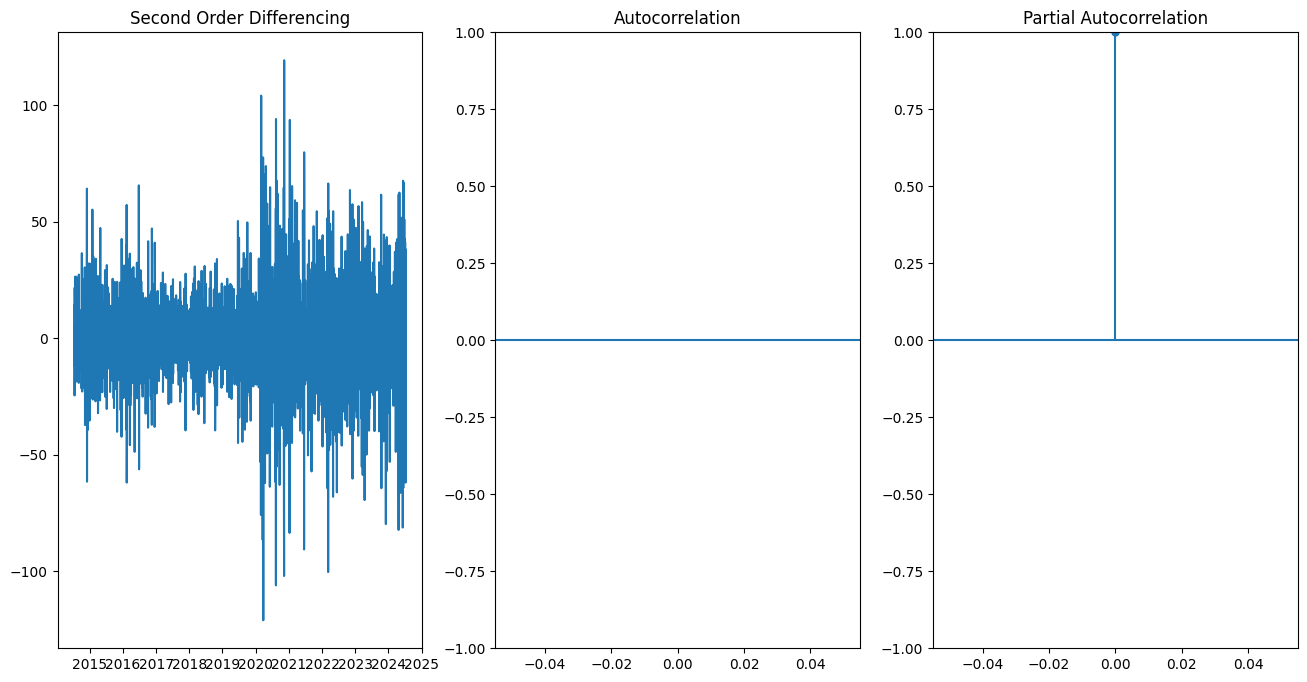

In [42]:
# second order differencing
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(131)  # Corrected typo here
ax1.set_title('Second Order Differencing')
ax1.plot(df_ten_year.Close.diff().diff());

ax2 = fig.add_subplot(132)
plot_acf(df_ten_year.Close.diff().diff(), ax=ax2);

ax3 = fig.add_subplot(133)
plot_pacf(df_ten_year.Close.diff().diff(), ax=ax3);

After first order differencing, the ACFs and PACFs both have one significant spike. Therefore, p=1 and q=1. 

In [43]:
# p = 1, d = 1, q = 1
arima_model= ARIMA(df_ten_year.Close, order=(1,1,1))
model = arima_model.fit()
print(model.summary())

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2515
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10361.541
Date:                Thu, 11 Jul 2024   AIC                          20729.083
Time:                        20:24:29   BIC                          20746.571
Sample:                             0   HQIC                         20735.430
                               - 2515                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0492      0.408      0.121      0.904      -0.750       0.848
ma.L1         -0.0847      0.405     -0.209      0.834      -0.879       0.710
sigma2       222.5684      3.423     65.019      0.0

In [44]:
# p = 0, d = 1, q = 1
arima_model= ARIMA(df_ten_year.Close, order=(0,1,1))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2515
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -10361.553
Date:                Thu, 11 Jul 2024   AIC                          20727.105
Time:                        20:24:29   BIC                          20738.764
Sample:                             0   HQIC                         20731.337
                               - 2515                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0356      0.015     -2.387      0.017      -0.065      -0.006
sigma2       222.5614      3.423     65.025      0.000     215.853     229.270
Ljung-Box (L1) (Q):                   0.00   Jarque-

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


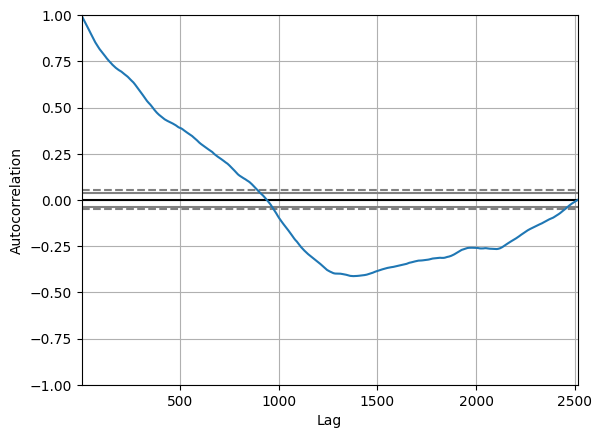

In [45]:
autocorrelation_plot(df_ten_year['Close'])
plt.show()

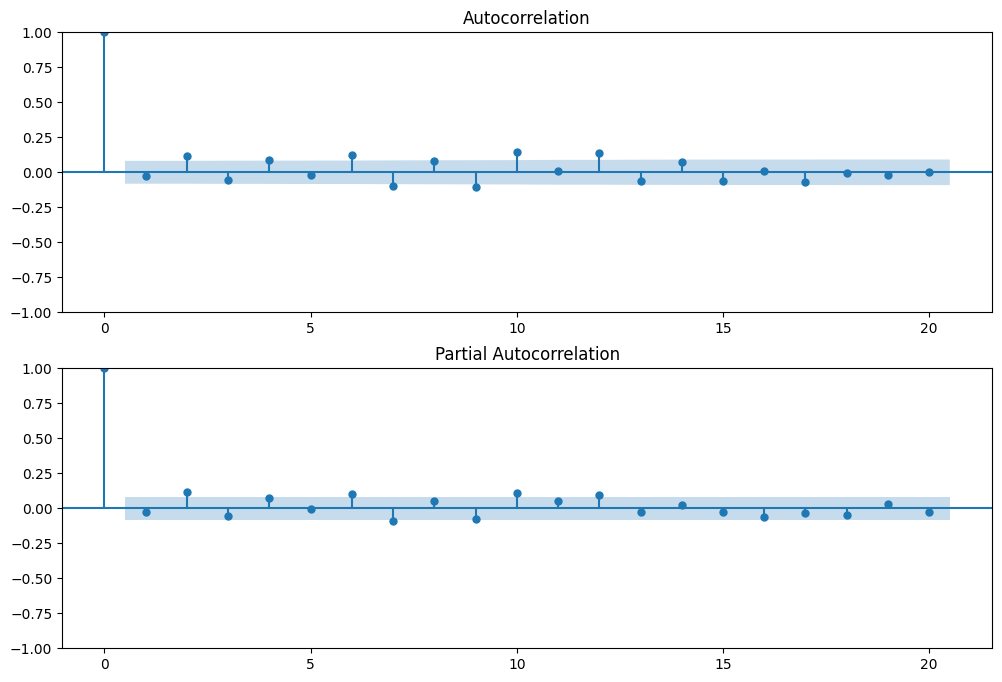

In [46]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_one_day['Close Price Difference'].iloc[1:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_one_day['Close Price Difference'].iloc[1:],lags=20,ax=ax2)

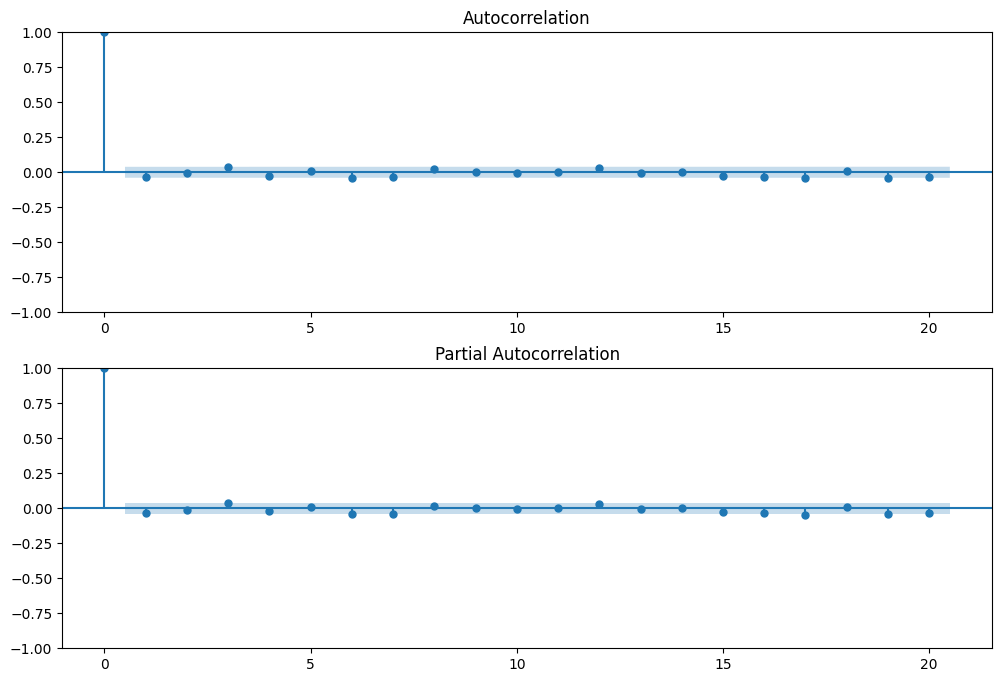

In [47]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_ten_year['Close'].diff().dropna(),lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_ten_year['Close'].diff().dropna(),lags=20,ax=ax2)

<Figure size 1600x800 with 0 Axes>

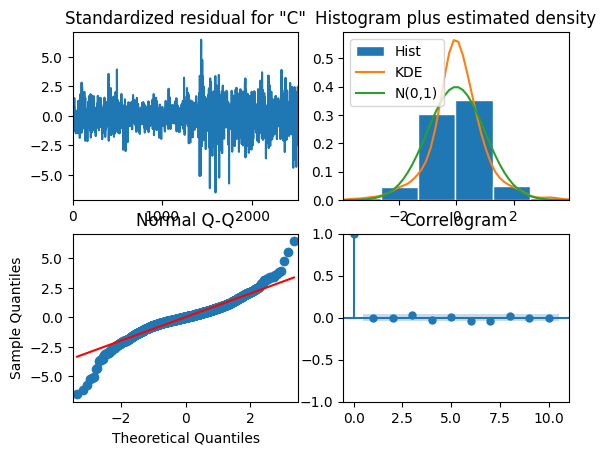

In [48]:
fig = plt.figure(figsize=(16, 8))
model.plot_diagnostics()
plt.show()

In [49]:
import statsmodels.api as sm